# Introduction

In this notebook we try to classify images first using a MLP, then using a CNN to hightlight the differences between both models regarding the image classification capabilities.

# Check dependencies

In [1]:
import matplotlib
print(matplotlib.__version__)

import numpy as np
print(np.__version__)

import cv2
print(cv2.__version__)

import pickle
print(pickle.format_version)

3.1.3
1.18.1
4.2.0
4.0


# Dataset settings

In [2]:
# How many images to generate?
NR_TRANSLATED_IMGS_TO_GENERATE_PER_ICON = 1000

# Load in the icons

Free icons are from: https://www.iconfinder.com (Creative Commons)

In [3]:
folder = "icons_persons/"
fnames = ["01_running.png",
          "02_oldman.png",
          "03_family_3heads.png",
          "04_family_4heads.png",
          "05_man_with_baby.png"]

(51, 51)


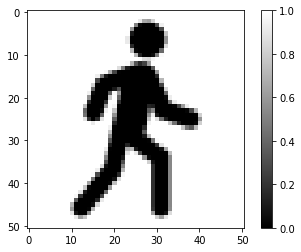

(51, 51)


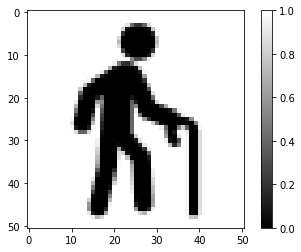

(51, 51)


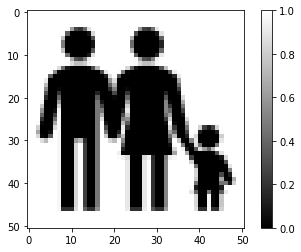

(51, 51)


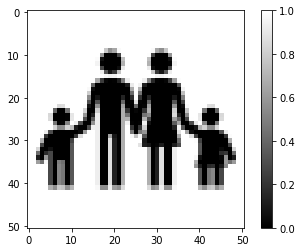

(51, 51)


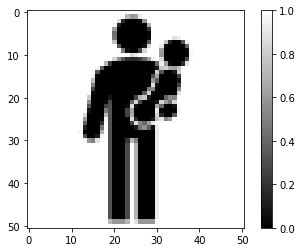

In [4]:
import matplotlib.pyplot as plt

scale_fac = 0.1

icons = []

for fname in fnames:
    
    # combine folder and filename to final filename
    fname_with_rel_path = folder + fname
    
    # read in the image
    img = cv2.imread(fname_with_rel_path)
    
    # convert to gray-scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # rescale
    new_size = (int(img.shape[0]*scale_fac), int(img.shape[1]*scale_fac))
    img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
    
    # normalize inputs to be in [0,1]
    img = img * (1/255)
    
    # show image
    print(img.shape)
    plt.imshow(img, cmap="gray")
    plt.colorbar()
    plt.show()
    
    # store image in Python list <icons>
    icons.append( img )

In [5]:
nr_icons = len(icons)
nr_icons

5

# Generate images with different locations of the icons

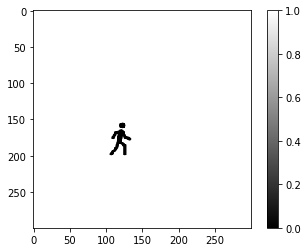

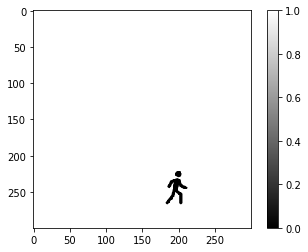

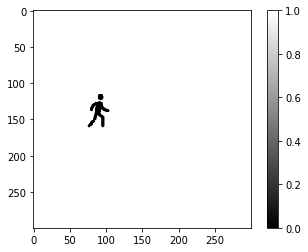

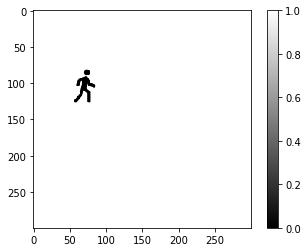

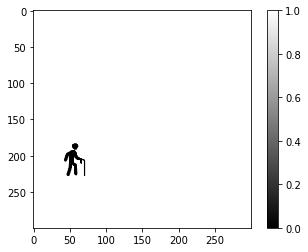

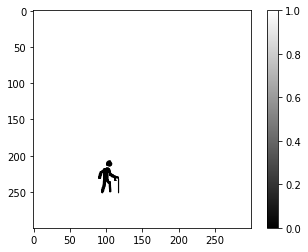

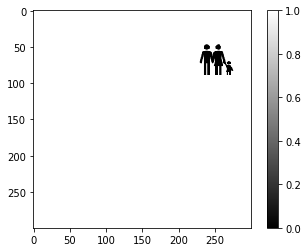

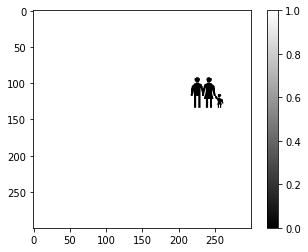

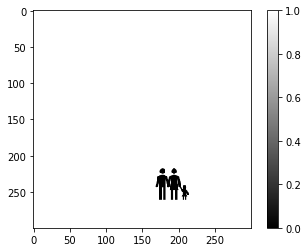

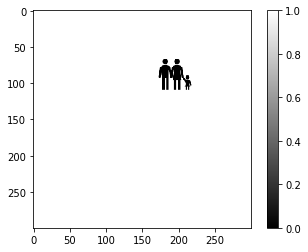

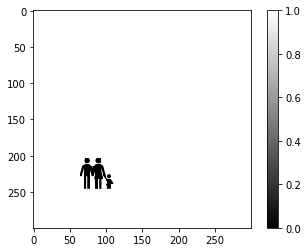

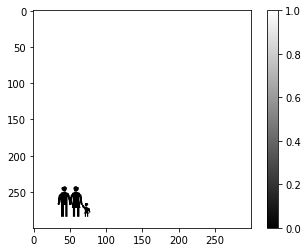

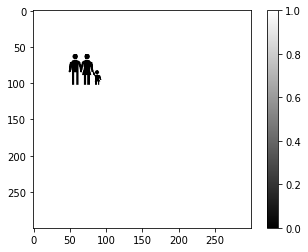

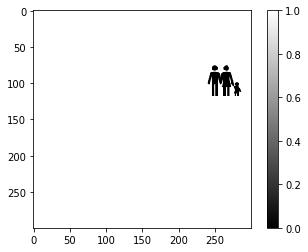

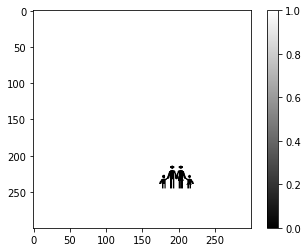

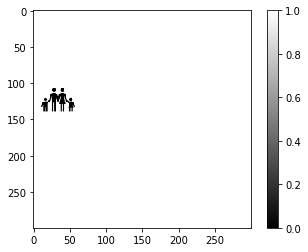

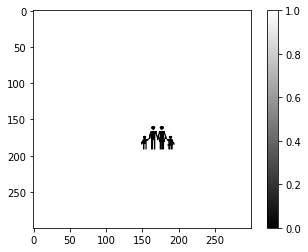

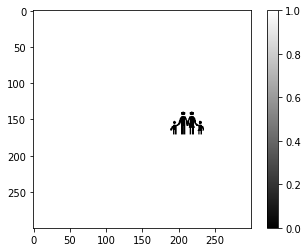

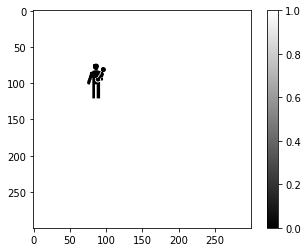

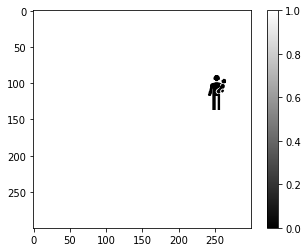

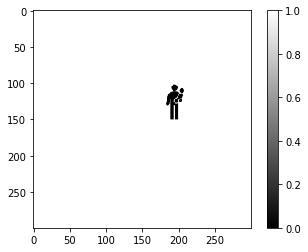

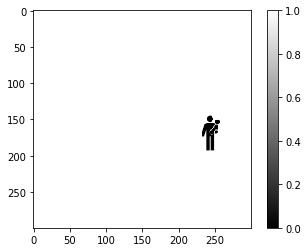

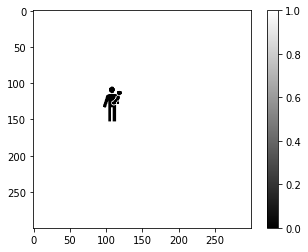

In [9]:
img_width = 300
img_height = 300

X = []
Y = []

for nr_icon in range(0,nr_icons):
    for nr_img in range(0,NR_TRANSLATED_IMGS_TO_GENERATE_PER_ICON):
        
        # get the icon image
        icon_img = icons[nr_icon]
        icon_height = icon_img.shape[0]
        icon_width = icon_img.shape[1]        
        
        # create a large image in which we will copy the icon image
        img = np.ones((img_height,img_width))
        
        # generate random (x,y) coordinates
        y = np.random.randint(0,img_height-icon_height)
        x = np.random.randint(0,img_width-icon_width)
        #print(y,x)
        
        # now copy the icon image into the large image
        # at location (x,y)
        img[y:y+icon_height,x:x+icon_width] = icon_img
        
        # display randomly some images
        if True and (np.random.randint(0,200)==0):
            plt.imshow(img, cmap="gray")
            plt.colorbar()
            plt.show()
        
        # save image and image label (icon id)
        X.append(img)
        Y.append(nr_icon)        

In [10]:
nr_images = len(X)
nr_images

5000

# A little excursion: Permutation of two lists

In [11]:
list1 = ["A","B","C"]
list2 = [1,2,3]

In [12]:
import random
random.shuffle(list1)
list1

['C', 'B', 'A']

In [13]:
list1 = ["A","B","C"]
list2 = [1,2,3]
list3 = list(zip(list1,list2))
print(list3)

[('A', 1), ('B', 2), ('C', 3)]


In [14]:
random.shuffle(list3)
list3

[('A', 1), ('C', 3), ('B', 2)]

In [15]:
list1, list2 = zip(*list3)
print(list1)
print(list2)

('A', 'C', 'B')
(1, 3, 2)


# Split images into train and test images

In [17]:
combined = list(zip(X,Y))
combined[:5]

[(array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]),
  0),
 (array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]),
  0),
 (array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]),
  0),
 (array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],


In [18]:
random.shuffle(combined)

In [19]:
len(combined)

5000

In [20]:
X,Y = zip(*combined)

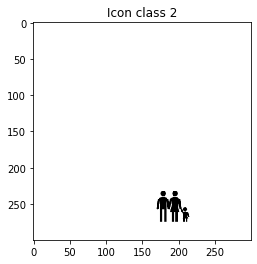

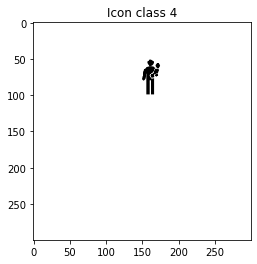

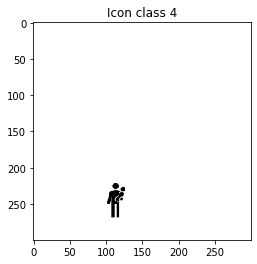

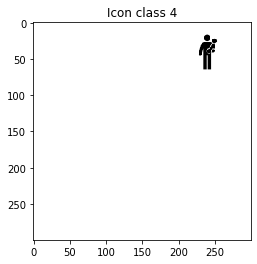

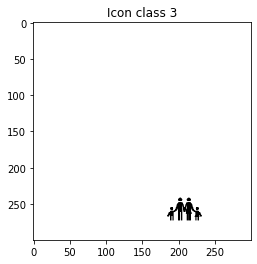

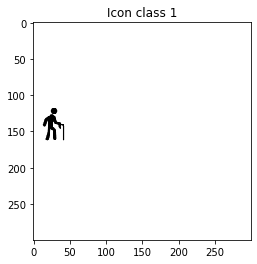

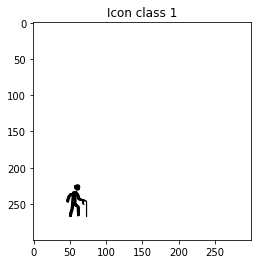

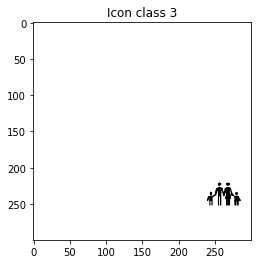

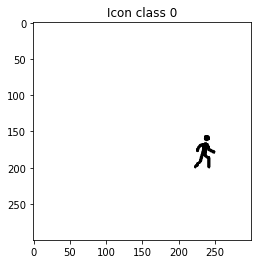

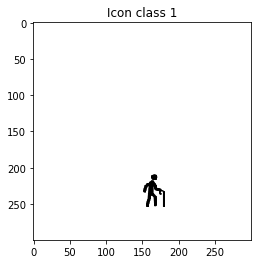

In [21]:
for i in range(0,10):
    plt.imshow(X[i], cmap="gray")
    plt.title("Icon class {0}".format(Y[i]))
    plt.show()

# Save all images and labels

In [22]:
len(X)

5000

In [23]:
len(Y)

5000

In [24]:
X[:2]

(array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

In [25]:
Y[:2]

(2, 4)

In [26]:
type(X)

tuple

In [27]:
type(Y)

tuple

In [28]:
dataset = [list(X), list(Y)]

In [29]:
fobj = open("translation_test.pkl", "wb")

In [30]:
pickle.dump(dataset, fobj)

In [31]:
fobj.close()